# Teaching Data Science

## Some preliminary coding questions

Miles Berry

University of Roehampton

7 April 2021

CTM at ATM2021

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]()

Click in a box to edit, shift-enter to run.

# Foundations of data science

## Introducing probability and statistics: 
## dice rolling

Many of you are likely to have covered some of the ideas of probability and statistics through having pupils roll and record the scores from dice. We can take the noise and drudgery out of this by getting a computer to roll the dice for us.

There are some interesting philosophical (and technical) issues here about how truly random these scores can be? What sort of evidence would convince you that these were not genuinely random numbers? How can deterministicly generated numbers look random? Are dice themselves truly random?

We'll start by loading a few standard libraries

In [4]:
from random import randint  # pseudorandom whole numbers
from math import sqrt       # squareroots

import matplotlib.pyplot as plt # basic graphics library
%matplotlib inline
                            # have Jupyter display static graphics inline
plt.style.use('ggplot')     # ggplot style graphics
plt.rcParams['figure.figsize'] = [10, 6] # make the graphs a bit bigger

import warnings             # how should we deal with Python warnings?
warnings.filterwarnings('ignore') # just ignore them. This is a good rule for life. 

Let's start by creating a function to roll a dice, and then rolling lots of dice lots of times. The code here does two, six sided dice, ('2d6' as we called it back in my Dungeon and Dragons days) 100 times. Can you modify the code to get 1000 rolls? Or what about eight sided dice?

In [2]:
def roll(dice=1,sides=6):
  score = 0
  for i in range(dice):
    score += randint(1,sides)
  return score

def rolls(dice=1,sides=6,times=1):
  scores = []
  for i in range(times):
    scores.append(roll(dice,sides))
  return scores

example = rolls(2,6,100) # roll two, 6-sided dice, 100 times.

example[:20]


[5, 5, 7, 5, 12, 8, 6, 8, 7, 11, 7, 4, 12, 7, 8, 4, 7, 3, 7, 8]

Can we work out the relative frequency (observed probability) of particular scores? 

In [6]:
def relativeFrequency(x, data):
    return(data.count(x) / len(data))

relativeFrequency(7, example)

0.25

Can we get the relative frequencies for all the possible scores?

Could we see that on a bar chart?

*Note that Python's syntax for range is from the first number, up to but **not** including the second*

*If you changed the example to show something other than '2d6', you might need to modify the range parameters here to include all the data.*

<BarContainer object of 11 artists>

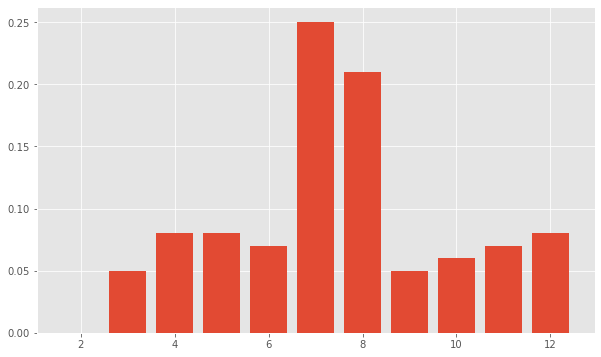

In [9]:
relativeFrequencies = []
for i in range(2, 13):
    relativeFrequencies.append(relativeFrequency(i, example))

relativeFrequencies

plt.bar(range(2, 13), relativeFrequencies) 

## Finding the mean

At the moment, the cell below crashes fairly dramatically (0 / 0 is Not a Number). Can you replace my two comments (the lines with the # in front) so that the total and count gets updated as we go through all the items in the data list?

In [10]:
def mymean(data):
    total = 0
    count = 0
    for i in data:
        # update total
        # update count
    return total/count

mymean(example)

IndentationError: expected an indented block (<ipython-input-10-335ec7f879e3>, line 7)

## Finding the mode

To work out the mode of our data, we need to know which item came up with the greatest frequency, so we may as well work out a frequency table...

Note that this uses Python's 'dict' datastructure which stores data as key, value pairs. 

In [6]:
def freqtable(data):
    freqtable = {}
    for i in data:
        if i in freqtable.keys():
            freqtable[i] += 1
        else:
            freqtable[i] = 1
    return(freqtable)

freqtable(example)

sorted(freqtable(example).items()) 

[(2, 4),
 (3, 7),
 (4, 9),
 (5, 8),
 (6, 17),
 (7, 14),
 (8, 15),
 (9, 11),
 (10, 4),
 (11, 9),
 (12, 2)]

Can you predict what the function below would do for bi- (or multi-) modal data? Try editing the way the example data is generated to test this.

In [8]:
def mymode(data):
    mode = 0
    max = 0
    freqs = freqtable(data)
    for i in freqs.keys():
        if freqs[i]>max:
            max=freqs[i]
            mode = i
    return mode

mymode(example)

6

## Finding the median

The usual approach to finding the median is to put the data into order and then pick the middle item, so we need to sort the data first. There are *lots* of algorithms for doing this, and you might think about how your pupils do this in class. Here, I'm using [Tony Hoare's Quicksort algorithm](http://rabbit.eng.miami.edu/class/een511/quicksort.pdf), which is one of the fastest (hence, I guess, the name). Notice the recursive definition here. Can you work out from the code how this works? 

It's worth noting the meta strategy here of reducing a big problem into simpler, but structurally identical problems and solving these. This 'divide and conquer' strategy is a common pattern in programming and maths. Can you think of some other examples?

In [9]:
def quicksort(data):
    if len(data)==0:
        return data
    else:
        lower = [x for x in data[1:] if x < data[0]]
        upper = [x for x in data[1:] if x >= data[0]]
        return quicksort(lower) + [data[0]] + quicksort(upper)



7

Now add in a function to work out the median by calling this quicksort function. Does it matter if you've an odd or even number of data? `len(data) % 2` is 0 for even, 1 for odd.

In [ ]:
def mymedian(data):
    # your code goes here...
    
mymedian(example)

Is it *absolutely* necessary to sort the data to find the median? The above algorithm is O(n log n). I can think of an O(n + k log k) algorithm, where k is the number of distinct values...

What algorithm do you teach in class?

## Finding the range

Finding the minimum and maximum of data is a nice programming challenge for KS3. I've missed out a couple of lines from the function here. Can you fill them in?

Also, do notice that Python copes perfectly well with the idea of infinity, although you should pause to wonder how this would be represented internally.

In [10]:
def myrange(data):
    minimum = float('inf')
    maximum = float('-inf')
    for i in data:
        if i < minimum:
            # What goes here?
        if i > maximum:
            # What does here?
    return (maximum - minimum)


myrange(example)

10

## Finding the standard deviation. 

Which algorthm do you like best, the square root of the mean squared deviation, or the square root of the difference between the mean of squares and the square of the means. Do these always give the same answer? How could you (or your pupils) be sure?

In [11]:
def mysd1(data):
    '''sqrt of mean squared deviations'''
    m = mymean(data)
    squaredDeviations = map(lambda x: (x-m)**2, data)
    return sqrt(mymean(squaredDeviations))

def mysd2(data):
    '''sqrt of (mean of squares - square of means)'''
    return ## can you add something here?

print('method 1',mysd1(example))
print('method 2',mysd2(example))

method 1 2.508605190140529
method 2 2.5086051901405297
